In [1]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("../movie-linearsvc-tfidf-alt.pkl", "rb") as f:
    model = pickle.load(f)

In [3]:
[svm, tfidf] = model

In [4]:
df = pd.read_pickle("../Sports_and_Outdoors_5_balanced_with_stopwords.pkl")
df.head()

,reviewText,overall,label
0,"[has, saved, my, wall, and, more, important, m...",5.0,2.0
1,"[bought, of, these, at, similar, price, and, t...",4.0,2.0
2,"[great, looking, ball, as, advertised]",5.0,2.0
3,"[great, gift, for, coworker]",5.0,2.0
4,"[love, it]",5.0,2.0


In [5]:
df["text"] = df["reviewText"].apply(lambda x: " ".join(x))

X = tfidf.transform(df["text"])
Y = df["label"]

In [6]:
pred_y = svm.predict(X)
print("Accuracy score:", accuracy_score(Y, pred_y))
print("Classification report")
print(classification_report(Y, pred_y))

Accuracy score: 0.759189
Classification report
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77    333334
         1.0       0.69      0.64      0.66    333334
         2.0       0.83      0.85      0.84    333332

    accuracy                           0.76   1000000
   macro avg       0.76      0.76      0.76   1000000
weighted avg       0.76      0.76      0.76   1000000



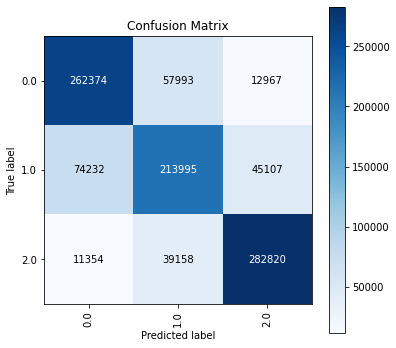

In [7]:
confusion_plot = skplt.metrics.plot_confusion_matrix(Y, pred_y, figsize=(6,6), x_tick_rotation=90)

In [8]:
print("Coefficients")
print(svm.coef_)
print("Intercepts")
print(svm.intercept_)
print("Classes")
print(svm.classes_)
print("Features")
print(svm.n_features_in_)

Coefficients
[[-0.32246573 -0.50029695  0.11490969 ...  0.         -0.4884383
  -0.02342097]
 [-0.0896397  -0.35575546 -0.22477569 ...  0.         -0.44791634
   0.14892695]
 [ 0.50555536  0.9647345   0.31464754 ...  0.          0.94993558
  -0.12813795]]
Intercepts
[-0.34926804 -0.32999752 -0.37766813]
Classes
[0. 1. 2.]
Features
125534
